In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:\Downloads\global_bleaching_environmental.csv", index_col=False, dtype='unicode')

pd.set_option('display.max_columns', None)
df.head()

,unlimited,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,0,2501.0,10324336.0,Donner,23.163,-82.526,Atlantic,NaN,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,Havana,Puntilla,8519.23,Exposed,0.0287,49.9,15.0,9.0,2005.0,10.0,NaN,NaN,NaN,50.2,301.61,302.05,300.67,296.72,304.69,1.6,8.0,-0.46,1.0,0.0,-3.56,2.24,0.0,3.13,17.0,3.0,0.0,1.63,7.88,0.98,-0.8,1.6,-6.12,1.83,-2.17,0.0,1.09,5.0,0.0,0.0,0.74,7.25,0.18,2005-09-15,NaN,NaN,NaN
1,1,3467.0,10324754.0,Donner,-17.575,-149.7833,Pacific,NaN,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Moorea,NaN,1431.62,Exposed,0.0262,51.2,15.0,3.0,1991.0,14.0,NaN,NaN,NaN,50.7,262.15,303.3,300.73,297.58,305.01,1.12,2.0,1.29,1.0,0.0,-2.73,3.1,0.5,2.77,13.25,2.0,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.0,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,NaN
2,2,1794.0,10323866.0,Donner,18.369,-64.564,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,Peter Island,Coral Gardens,182.33,Exposed,0.0429,61.52,15.0,1.0,2006.0,7.0,NaN,NaN,NaN,50.9,298.79,299.18,300.32,297.12,304.14,1.22,8.0,0.04,1.0,0.0,-2.92,2.83,16.0,4.52,23.0,3.0,0.0,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7.0,1.31,7.0,0.0,0.0,1.04,11.66,0.26,2006-01-15,NaN,NaN,NaN
3,3,8647.0,10328028.0,Donner,17.76,-64.568,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3219,313.13,Exposed,0.0424,65.39,15.0,4.0,2006.0,9.02,NaN,NaN,NaN,50.9,300.16,299.61,300.38,297.25,304.07,1.19,3.0,-0.07,1.0,0.0,-2.77,2.47,22.0,4.75,24.0,3.0,0.0,2.37,16.73,1.07,-2.27,1.19,-4.63,2.19,-1.49,3.0,0.94,4.0,0.0,0.0,0.75,5.64,0.2,2006-04-15,NaN,NaN,NaN
4,4,8648.0,10328029.0,Donner,17.769,-64.583,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3194,792.0,Exposed,0.0424,65.39,15.0,4.0,2006.0,12.5,NaN,NaN,NaN,50.9,300.15,299.7,300.38,296.63,303.76,1.18,3.0,0.0,1.0,0.0,-2.84,2.3,16.0,4.16,20.0,3.0,0.0,2.24,13.86,1.16,-2.19,1.18,-5.25,1.87,-1.5,3.0,1.33,5.0,0.0,0.0,0.92,6.89,0.25,2006-04-15,NaN,NaN,NaN


In [2]:
# Feature selection

df = df.drop(['unlimited', 'Data_Source', 'Date', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments', 'Date_Day'], axis=1)  # Drop irrelevant features
df = df.drop(['Site_ID', 'Sample_ID', 'Ocean_Name', 'Reef_ID', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name'], axis=1)  # Lokasi bisa diwakilkan oleh latitude dan longitude

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Latitude_Degrees                       32678 non-null  object
 1   Longitude_Degrees                      32678 non-null  object
 2   Distance_to_Shore                      32678 non-null  object
 3   Exposure                               32678 non-null  object
 4   Turbidity                              32678 non-null  object
 5   Cyclone_Frequency                      32678 non-null  object
 6   Date_Month                             32678 non-null  object
 7   Date_Year                              32678 non-null  object
 8   Depth_m                                32678 non-null  object
 9   Substrate_Name                         22320 non-null  object
 10  Percent_Cover                          22525 non-null  object
 11  Bleaching_Level

In [3]:
# Semua dtype pas import csv adalah object, coba convert ke wujud sebenarnya
df = df.apply(pd.to_numeric, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       32678 non-null  float64
 1   Longitude_Degrees                      32678 non-null  float64
 2   Distance_to_Shore                      32678 non-null  float64
 3   Exposure                               32678 non-null  object 
 4   Turbidity                              32678 non-null  float64
 5   Cyclone_Frequency                      32678 non-null  float64
 6   Date_Month                             32678 non-null  float64
 7   Date_Year                              32678 non-null  float64
 8   Depth_m                                32678 non-null  float64
 9   Substrate_Name                         22320 non-null  object 
 10  Percent_Cover                          22525 non-null  float64
 11  Bl

In [4]:
# Cek unique value pada categorical & ordinal data
for col in df.columns:
    if df[col].dtypes == 'object':
        unique_cat = len(df[col].unique())
        print("'{col}': {unique_cat}".format(col=col, unique_cat=unique_cat))

# Jumlah kategori masih masuk akal untuk one hot encoding

'Exposure': 3
'Substrate_Name': 4
'Bleaching_Level': 2


In [5]:
""" 
    Pertimbangan sebelum lanjut:
    'Bleaching_Level' awalnya adalah kandidat target, tapi karena banyak NULL (hampir setengahnya)
    jadi lebih gampang kalau ganti target ke 'Percent_Bleaching' dan hapus 'Bleaching_Level'.
    'Substrate_Name' juga banyak NULL dan gak mungkin di-replace (imputation), jadi hapus juga.
"""

# Handle missing data
df = df.drop(['Bleaching_Level', 'Substrate_Name', 'Percent_Cover'], axis=1)    # 'Percent_Cover' berkorelasi dgn 'Substrate_Name', kebetulan banyak NULL juga

In [6]:
# One hot encoding
one_hot = pd.get_dummies(df['Exposure'], prefix="Exposure")

# Sisipkan hasil one-hot encoding di tempat column originalnya (dan hapus column originalnya)
df = pd.concat([df.iloc[:, :df.columns.get_loc("Exposure")], one_hot, df.iloc[:, df.columns.get_loc("Exposure"):]], axis=1)
df = df.drop('Exposure', axis=1)

df.head(3)

,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Turbidity,Cyclone_Frequency,Date_Month,Date_Year,Depth_m,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
0,23.163,-82.5260,8519.23,1,0,0,0.0287,49.90,9.0,2005.0,10.0,50.2,301.61,302.05,300.67,296.72,304.69,1.60,8.0,-0.46,1.0,0.0,-3.56,2.24,0.0,3.13,17.00,3.0,0.00,1.63,7.88,0.98,-0.80,1.60,-6.12,1.83,-2.17,0.00,1.09,5.0,0.0,0.00,0.74,7.25,0.18
1,-17.575,-149.7833,1431.62,1,0,0,0.0262,51.20,3.0,1991.0,14.0,50.7,262.15,303.30,300.73,297.58,305.01,1.12,2.0,1.29,1.0,0.0,-2.73,3.10,0.5,2.77,13.25,2.0,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19
2,18.369,-64.5640,182.33,1,0,0,0.0429,61.52,1.0,2006.0,7.0,50.9,298.79,299.18,300.32,297.12,304.14,1.22,8.0,0.04,1.0,0.0,-2.92,2.83,16.0,4.52,23.00,3.0,0.00,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26


In [7]:
# Explore the data
df.describe()

,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Turbidity,Cyclone_Frequency,Date_Month,Date_Year,Depth_m,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
count,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.00000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.0,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000,32678.000000
mean,8.840203,24.518858,3010.095024,0.360242,0.557837,0.081921,0.075006,52.575864,7.035559,2009.216843,7.055448,8.074418,294.051367,301.36403,300.457920,295.879143,305.138575,1.650296,4.733086,0.263602,0.898495,0.0,-3.505337,3.453773,7.613538,4.812367,23.695960,5.240971,2.851502,3.027992,18.582784,2.041421,-0.988884,1.649560,-6.463812,2.775820,-1.884450,2.015829,1.748957,8.019493,1.037736,1.113300,1.411066,10.365179,0.579947
std,15.355016,104.310537,10240.594109,0.480078,0.496651,0.274248,0.061455,7.472715,2.889190,5.446464,4.236799,18.172639,14.944330,1.99608,1.558294,2.671932,1.294160,0.720794,2.078212,0.826319,0.228944,0.0,0.625942,1.189122,6.043359,1.267097,6.713133,2.426394,4.333678,1.630667,9.454051,1.350974,1.661151,0.722038,2.429136,0.979884,1.086074,2.922070,0.758258,4.213266,2.023591,3.276113,1.358015,6.036460,1.191628
min,-28.864500,-179.859400,3.200000,0.000000,0.000000,0.000000,0.017600,19.860000,1.000000,1983.000000,0.000000,0.000000,262.150000,287.04000,290.880000,280.590000,300.480000,0.790000,0.000000,-4.260000,0.000000,0.0,-7.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.970000,0.000000,-19.240000,0.000000,-8.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.461200,-80.096900,123.510000,0.000000,0.000000,0.000000,0.039500,48.260000,5.000000,2005.000000,4.000000,0.000000,298.600000,300.29000,299.790000,294.470000,304.420000,1.180000,3.000000,-0.230000,0.780000,0.0,-3.750000,2.790000,3.000000,3.860000,19.000000,3.750000,0.000000,2.190000,13.330000,1.320000,-1.850000,1.180000,-7.580000,2.240000,-2.640000,0.000000,1.240000,5.250000,0.000000,0.000000,0.890000,6.770000,0.270000
50%,11.882200,55.219400,450.140000,0.000000,1.000000,0.000000,0.056800,51.760000,7.000000,2009.000000,6.000000,0.000000,300.860000,301.74000,300.810000,296.920000,305.100000,1.340000,5.000000,0.250000,0.880000,0.0,-3.380000,3.160000,6.000000,4.710000,23.000000,5.000000,1.270000,2.740000,17.050000,1.900000,-0.720000,1.340000,-5.670000,2.540000,-1.470000,1.000000,1.560000,7.000000,1.000000,0.000000,1.140000,8.970000,0.380000
75%,20.966600,118.860300,1703.565000,1.000000,1.000000,0.000000,0.083700,56.550000,9.000000,2014.000000,10.000000,5.500000,302.020000,302.75750,301.610000,297.670000,305.790000,2.060000,6.000000,0.760000,0.980000,0.0,-3.120000,3.680000,11.000000,5.740000,28.000000,6.000000,4.050000,3.420000,21.080000,2.370000,0.110000,2.060000,-4.790000,3.000000,-1.250000,3.000000,2.070000,9.000000,1.000000,1.100000,1.600000,11.970000,0.600000
max,36.750000,179.933000,195281.210000,1.000000,1.000000,1.000000,1.284500,99.430000,12.000000,2019.000000,50.300000,100.000000,30

<AxesSubplot: ylabel='Frequency'>

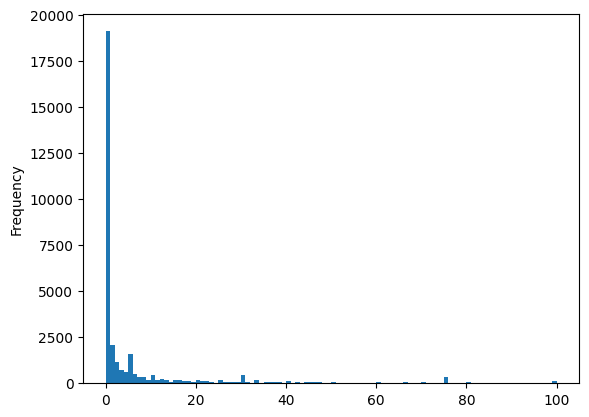

In [8]:
import matplotlib.pyplot as plt

# Target value distribution
df['Percent_Bleaching'].plot(kind='hist', bins=100)

In [9]:
# Split data untuk input dan target
X = df.copy()
X = X.drop('Percent_Bleaching', axis=1)
Y = df['Percent_Bleaching'].copy()
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       32678 non-null  float64
 1   Longitude_Degrees                      32678 non-null  float64
 2   Distance_to_Shore                      32678 non-null  float64
 3   Exposure_Exposed                       32678 non-null  uint8  
 4   Exposure_Sheltered                     32678 non-null  uint8  
 5   Exposure_Sometimes                     32678 non-null  uint8  
 6   Turbidity                              32678 non-null  float64
 7   Cyclone_Frequency                      32678 non-null  float64
 8   Date_Month                             32678 non-null  float64
 9   Date_Year                              32678 non-null  float64
 10  Depth_m                                32678 non-null  float64
 11  Cl

In [10]:
# Normalize input
from sklearn.preprocessing import StandardScaler

# Melakukan standardization (z-score) karena tidak ada outlier handling (khawatir jika outlier terlalu jauh, interval data terlalu kecil)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Result: mean = 0; std = 1
X_standardized.describe()

,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Turbidity,Cyclone_Frequency,Date_Month,Date_Year,Depth_m,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
count,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,32678.0,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04,3.267800e+04
mean,6.958005e-18,2.783202e-17,-1.043701e-17,-6.958005e-18,6.958005e-18,2.783202e-17,1.687316e-16,-1.440307e-15,1.461181e-16,-7.055417e-15,-8.871456e-17,2.435302e-16,-2.254394e-14,6.994534e-15,-1.839349e-14,-3.091007e-14,1.600341e-16,1.600341e-16,-3.479002e-18,2.052611e-16,0.0,-3.287657e-16,-2.539672e-16,-5.218503e-17,-5.496824e-16,-5.148923e-16,-8.001705e-17,2.783202e-17,-2.696227e-16,-3.479002e-17,6.001279e-17,-6.958005e-18,2.087401e-17,6.958005e-18,1.148071e-16,-1.182861e-16,7.827755e-17,-2.574462e-16,2.783202e-17,-3.913878e-17,1.391601e-17,-2.348327e-17,1.078491e-16,-8.697506e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.455568e+00,-1.959355e+00,-2.936295e-01,-7.503945e-01,-1.123214e+00,-2.987145e-01,-9.341317e-01,-4.378109e+00,-2.089046e+00,-4.813627e+00,-1.665303e+00,-2.134713e+00,-7.176190e+00,-6.146510e+00,-5.722218e+00,-3.599746e+00,-1.193557e+00,-2.277514e+00,-5.474484e+00,-3.924580e+00,0.0,-6.669511e+00,-2.904519e+00,-1.259838e+00,-3.798006e+00,-3.529845e+00,-2.160017e+00,-6.579966e-01,-1.856932e+00,-1.965620e+00,-1.511096e+00,-6.610649e+00,-2.284625e+00,-5.259640e+00,-2.832847e+00,-6.441236e+00,-6.898739e-01,-2.306583e+00,-1.903420e+00,-5.128271e-01,-3.398287e-01,-1.039081e+00,-1.717122e+00,-4.866919e-01
25%,-4.154408e-01,-1.002941e+00,-2.818810e-01,-7.503945e-01,-1.123214e+00,-2.987145e-01,-5.777682e-01,-5.775584e-01,-7.045539e-01,-7.742469e-01,-7.211800e-01,3.043765e-01,-5.380779e-01,-4.286294e-01,-5.273952e-01,-5.552529e-01,-6.524789e-01,-8.339439e-01,-5.973596e-01,-5.175801e-01,0.0,-3.908782e-01,-5.582133e-01,-7.634178e-01,-7.516248e-01,-6.995291e-01,-6.144896e-01,-6.579966e-01,-5.139032e-01,-5.556205e-01,-5.340086e-01,-5.183932e-01,-6.503365e-01,-4.595069e-01,-5.468278e-01,-6.956816e-01,-6.898739e-01,-6.712292e-01,-6.573370e-01,-5.128271e-01,-3.398287e-01,-3.837029e-01,-5.955865e-01,-2.601076e-01
50%,1.981140e-01,2.943232e-01,-2.499849e-01,-7.503945e-01,8.903023e-01,-2.987145e-01,-2.962573e-01,-1.091807e-01,-1.230782e-02,-3.981417e-02,-2.491183e-01,4.556067e-01,1.883569e-01,2.259427e-01,3.895584e-01,-2.980735e-02,-4.304982e-01,1.284365e-01,-1.646135e-02,-8.078526e-02,0.0,2.002398e-01,-2.470546e-01,-2.669976e-01,-8.078965e-02,-1.0

In [11]:
# Berganti dari tahap premodel ke modelling

# Model decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split dataset (non-standardized)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Fit the model
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,Y_train)

# Test and evaluate the model
Y_pred = DecisionTreeRegModel.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

# Split dataset (standardized)
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(X_standardized,Y,test_size=0.2,random_state=42)

# Fit the model
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train_s,Y_train_s)

# Test and evaluate the model
Y_pred = DecisionTreeRegModel.predict(X_test_s)
mse = mean_squared_error(Y_test_s, Y_pred)
rmse_s = np.sqrt(mse)

print("non-standardized: {x}".format(x=rmse))
print("standardized:     {x}".format(x=rmse_s))
# Hasilnya sama karena gak ada gradient calculation di decision tree

non-standardized: 10.932890006320239
standardized:     10.95247171933573


In [12]:
# Model random forest
from sklearn.ensemble import RandomForestRegressor

# Fit the model (non-standardized)
RFRegModel = RandomForestRegressor(random_state=42)
RFRegModel.fit(X_train, Y_train)

# Test and evalueate the model
Y_pred = RFRegModel.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

# Fit the model (standardized)
RFRegModel = RandomForestRegressor(random_state=42)
RFRegModel.fit(X_train_s, Y_train_s)

# Test and evalueate the model
Y_pred = RFRegModel.predict(X_test)
mse = mean_squared_error(Y_test_s, Y_pred)
rmse_s = np.sqrt(mse)

print("non-standardized: {x}".format(x=rmse))
print("standardized:     {x}".format(x=rmse_s))

non-standardized: 9.177297443239224
standardized:     33.65896817186513


In [13]:
from sklearn.linear_model import LinearRegression

# Multiple linear regression
# Non-standardized
LRegModel = LinearRegression()
LRegModel.fit(X_train, Y_train)

Y_pred = LRegModel.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

# Standardized
LRegModel = LinearRegression()
LRegModel.fit(X_train_s, Y_train_s)

Y_pred = LRegModel.predict(X_test_s)
mse = mean_squared_error(Y_test_s, Y_pred)
rmse_s = np.sqrt(mse)

print("non-standardized: {x}".format(x=rmse))
print("standardized:     {x}".format(x=rmse_s))

non-standardized: 14.621570895482852
standardized:     14.620914895275506


In [14]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=500, batch_size=100, random_state=42)
mlp.fit(X_train,Y_train)

Y_pred = mlp.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

mlp = MLPRegressor(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=500, batch_size=100, random_state=42)
mlp.fit(X_train_s,Y_train_s)

Y_pred = mlp.predict(X_test_s)
mse = mean_squared_error(Y_test_s, Y_pred)
rmse_s = np.sqrt(mse)

print("non-standardized: {x}".format(x=rmse))
print("standardized:     {x}".format(x=rmse_s))
print("min: {x}".format(x=Y_pred.min()))
print("max: {x}".format(x=Y_pred.max()))

# Bisa dilihat bahwa semua model di atas tidak dibatasi untuk menebak dalam range 0 sampai 100

non-standardized: 22.721307859723908
standardized:     11.864539540682761
min: -13.274593489485564
max: 157.67985913534434
